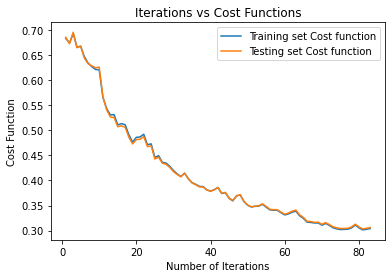

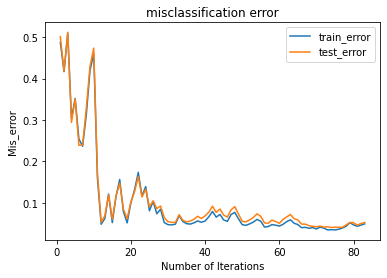

In [79]:
from mnist import MNIST
import numpy as np
import math
from matplotlib import pyplot as plt
I=np.identity(784)
lamb=0.0001
sum=0
p1=[]
mndata=MNIST(r'C:\Users\ppaidi')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())


#making the values 2 and 7 as -1 and 1
z1, z2 = 2,7 
X_train = np.vstack((X_train[labels_train==z1], X_train[labels_train==z2]))
labels_train = np.hstack((labels_train[labels_train==z1], labels_train[labels_train==z2]))
X_test = np.vstack((X_test[labels_test==z1], X_test[labels_test==z2]))
labels_test = np.hstack((labels_test[labels_test==z1], labels_test[labels_test==z2]))


X_train = X_train/255.0
X_test = X_test/255.0
(m,n)=X_train.shape
(m1,n1)=X_test.shape

#assigning the y_values 
l_train=np.zeros(m)
l_test=np.zeros(m1)
l_train[labels_train==z1] = -1
l_train[labels_train==z2] = 1
l_test[labels_test==z1] = -1
l_test[labels_test==z2] = 1
Y=l_train
Y1=l_test
yhat_train=np.zeros(m)
yhat_test=np.zeros(m1)

#initiation of values
lam=0.1
N= 0.01
w=np.zeros(n)
b=np.zeros(m)
b1=np.zeros(m1)
wt=np.zeros(n)
bt=np.zeros(m)
bt1=np.zeros(m1)
cost=[]
cost1=[]
count1=[]
count=0
mis_error=[]
mis_error1=[]
converged= False
J=0
J1=0

#convergence
while not converged:
    #train weights
    idx = np.random.randint(X_train.shape[0])
    X_new=X_train[idx, :]
    U_new=1/(1+math.exp(-Y[idx]*(b[idx]+np.dot(X_new,w))))
    wt=w-N*((X_new*((U_new-1)*Y[idx])) +2*lam*w)
    epsilon=np.absolute(wt-w)
    w=wt[:]

    #train
    U_new=1/(1+math.exp(-Y[idx]*(b[idx]+np.dot(X_new,w))))
    bt=b - N*(U_new-1)*Y[idx]/m
    epsilon1=np.absolute(bt-b)
    b=bt[:]
    
    #test
    idx1 = np.random.randint(X_test.shape[0])
    X1_new=X_test[idx1, :]
    U1_new=1/(1+math.exp(-Y1[idx1]*(b1[idx1]+np.dot(X1_new,w))))
    bt1=b1 - N*(U1_new-1)*Y1[idx1]/m1
    b1=bt1[:]
    
    converged=True
    
    for i in range(n):
        if epsilon[i]>0.001:  
            converged=False
            break
    
    #cost function of train
    J=lam*np.linalg.norm(w, ord=2)**2+(np.sum(np.log(1+np.exp(np.multiply(-Y,(b+np.dot(X_train,w)))))))/m 
    #cost function of test
    J1=lam*np.linalg.norm(w, ord=2)**2+(np.sum(np.log(1+np.exp(np.multiply(-Y1,(b1+np.dot(X_test,w)))))))/m1 
    
    #counting the number of iteartions
    count=count+1
    
    # for miscalssification error
    # y_hat train calc
    yhat_train=b+np.dot(X_train,w)
    mis=0
    
    # y_hat test calc
    yhat_test=b1+np.dot(X_test,w)
    mis1=0 

    #calc of error for train
    for i in range(m):
        if yhat_train[i]*Y[i]<0:
            mis=mis+1
    
    #calc of error for test
    for i in range(m1):
        if yhat_test[i]*Y1[i]<0:
            mis1=mis1+1      
    
    mis_error.append(mis/m)    # appending the train_error
    mis_error1.append(mis1/m1) # appending the test_error
    
    cost.append(J)
    cost1.append(J1)
    count1.append(count)

#plotting
fig1=plt.figure("Plot1")
plt.plot(count1,cost,label='Training set Cost function')
plt.plot(count1,cost1,label='Testing set Cost function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.legend()
plt.title("Iterations vs Cost Functions")

fig2=plt.figure("plot")
plt.plot(count1,mis_error,label='train_error')
plt.plot(count1,mis_error1,label='test_error')
plt.xlabel('Number of Iterations')
plt.ylabel('Mis_error')
plt.title("misclassification error")
plt.legend()
plt.show() 